Distance to impact: 9.340 m
Max height: 2.040 m
Time of flight: 1.268 s
Velocity vector at time of impact is: 6.521 m/s at -53.621 degrees 
Range was reduced by: 19.263 m due to drag


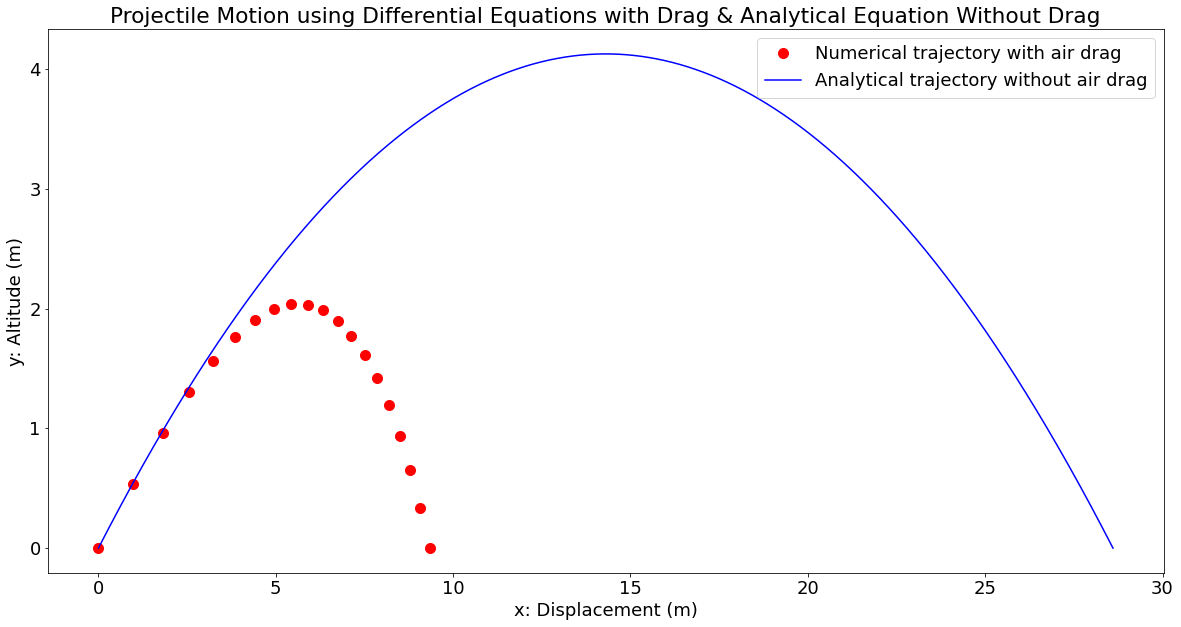

In [9]:
# This program calculates and plots the difference between a soccer ball
# kicked from the ground using an initial velocity and an angle with and
# without the air resistance/friction.

# Import libraries and modules
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib.pyplot import plot, rc, figure, legend, title, xlabel, ylabel

# Assign the given initial conditions and constants
theta = np.radians(40)  # The initial angle of the velocity
b = 0.006  # kg/m - Atmospheric friction
g = 9.81  # m/s2 - The acceleration due to gravity
m = 0.45  # kg - Mass of the ball
v0 = 18  # m/s - The initial velocity of the ball
x0 = 0  # m - The initial x position of the ball
y0 = 0  # m - The initial y position of the ball

# Define calculated values and other constants
tmax = v0 * np.sin(theta) * 2 / g  # Max time of projectile
steps = 20000  # The number of points used to calculate the projectile motion
t_arr = np.linspace(0, tmax, steps)  # The uniformly distributed time array


# Analytical - X position function
def xt(t):
    """
    Returns the analytical x position of a projectile motion disregarding
    air resistance at the given time or an array for the given time array.

    Keyword arguments:
    t -- time in seconds (can be a single number or an array of numbers)
    """
    return v0 * t * np.cos(theta)


# Analytical - Y position function
def yt(t):
    """
    Returns the y position/altitude of a projectile motion disregarding
    air resistance at the given time or an array for the given time array.

    Keyword arguments:
    t -- time in seconds (can be a single number or an array of numbers)
    """
    return (v0 * t * np.sin(theta)) - (1 / 2 * g * (t**2))


# Compute the analytical solution for x and y position based on the time array.
analytical_xpos_arr = xt(t_arr)
analytical_ypos_arr = yt(t_arr)


# Numerical dvdt function that returns the dv/dt as an array.
def dvdt_arr(t, y_arr):
    """
    Returns the dv/dt of the motion equation with air friction as an array
    containing the x and y components of the velocity and their component
    derivative respectively.

    Keyword arguments:
    t -- time in seconds (can be a single number or an array of numbers)
    y_arr -- the initial conditions of the differential equation.
    """
    vx = y_arr[2]
    vy = y_arr[3]
    v = np.sqrt(vx**2 + vy**2)
    return np.array([vx, vy, -(b * v * vx) / m, (-g - (b / m * v * vy))])


# Initial conditions - Position is (0,0) and the v0 is separated
# into its x and y components.
y0_arr = np.array([0, 0, np.cos(theta) * v0, np.sin(theta) * v0])

# Solve the differential equation:
sol = solve_ivp(dvdt_arr, (t_arr[0], t_arr[-1]),
                y0_arr,
                t_eval=t_arr,
                method='LSODA')

# Assign the solution to variables for easier and faster access.
t_sol = sol['t']
y_sol = sol['y']
xpos = y_sol[0]
ypos = y_sol[1]
vx = y_sol[2]
vy = y_sol[3]

# Find the positive y values only and adjust x pos accordingly
ypos_positive = ypos[ypos > 0]
ypos_length = len(ypos_positive)
xpos_positive = xpos[0:ypos_length]

# Calculate and find the values of distance to impact, time of flight,
# velocity at impact, and how much drag reduces the range.
distance_to_impact = xpos_positive[-1]
max_height = np.max(ypos_positive)
time_of_flight = t_sol[ypos_length]
impact_velocity = np.array([vx[ypos_length], vy[ypos_length]])
impact_velocity_mag = np.sqrt(impact_velocity[0]**2 + impact_velocity[1]**2)
impact_angle = np.rad2deg(np.arctan(impact_velocity[1] / impact_velocity[0]))
range_reduced_by_drag = analytical_xpos_arr[-1] - xpos_positive[-1]

# Print the answers to questions obtained above to the screen
print(f"Distance to impact: {distance_to_impact:.3f} m")
print(f"Max height: {max_height:.3f} m")
print(f"Time of flight: {time_of_flight:.3f} s")
print(
    f"Velocity vector at time of impact is: {impact_velocity_mag:.3f} m/s \
at {impact_angle:.3f} degrees "
)
print(f"Range was reduced by: {range_reduced_by_drag:.3f} m due to drag")

# Pick up 20 points uniformly from the x and y pos array for graphing
x_graph_indices = np.linspace(0, ypos_length - 1, 20, dtype=int)

# Plot the analytical vs numeric solution
figure(figsize=(20, 10))
plot(xpos_positive[x_graph_indices],
     ypos_positive[x_graph_indices],
     'r.',
     markersize=20)
plot(analytical_xpos_arr, analytical_ypos_arr, 'b-')

# Add more plot information
legend([
    "Numerical trajectory with air drag",
    "Analytical trajectory without air drag"
],
       loc="upper right")
title(
    "Projectile Motion using Differential Equations with Drag \
& Analytical Equation Without Drag"
)
xlabel("x: Displacement (m)")
ylabel("y: Altitude (m)")
rc('font', size=16)  # Controls default text sizes of the plot